In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re
import sklearn
from sklearn import svm
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
sms = pd.read_csv('/content/drive/MyDrive/spam.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
sms.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
sms.shape


(5572, 2)

In [24]:
sms.drop_duplicates(inplace=True)


In [25]:
sms.reset_index(drop=True, inplace=True)


In [26]:
sms.shape


(5169, 2)

In [27]:
sms['label'].value_counts()


ham     4516
spam     653
Name: label, dtype: int64

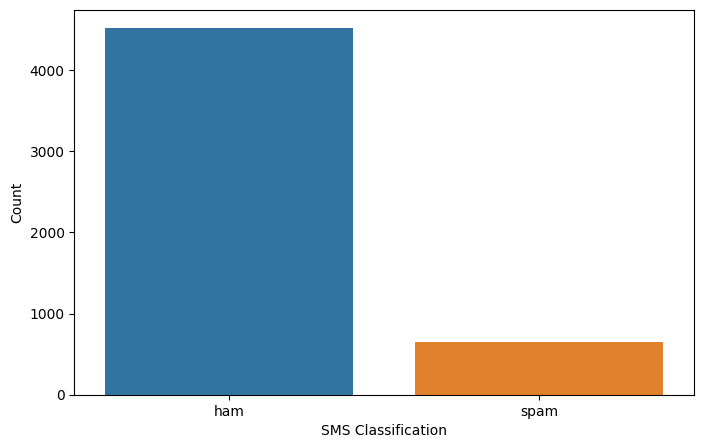

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=sms)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

In [29]:
corpus = []
ps = PorterStemmer()

for i in range(0,sms.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms.message[i])
    message = message.lower()
    words = message.split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in words]
    message = ' '.join(words)
    corpus.append(message)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [31]:
y = pd.get_dummies(sms['label'])
y = y.iloc[:, 1].values

In [32]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [33]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0, 1.1, 0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i, 1), round(score * 100, 2)))
    if score > best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy * 100, 2), round(alpha_val, 1)))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Accuracy score for alpha=0.0 is: 97.29%
Accuracy score for alpha=0.1 is: 97.78%
Accuracy score for alpha=0.2 is: 97.97%
Accuracy score for alpha=0.3 is: 97.97%
Accuracy score for alpha=0.4 is: 97.97%
Accuracy score for alpha=0.5 is: 97.97%
Accuracy score for alpha=0.6 is: 97.97%
Accuracy score for alpha=0.7 is: 97.97%
Accuracy score for alpha=0.8 is: 97.87%
Accuracy score for alpha=0.9 is: 97.87%
Accuracy score for alpha=1.0 is: 97.68%
--------------------------------------------
The best accuracy is 97.97% with alpha value as 0.2


In [34]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [35]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [38]:
acc_s = accuracy_score(y_test, y_pred)*100

In [39]:
print("Accuracy Score {} %".format(round(acc_s,2)))

Accuracy Score 97.78 %


In [40]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [41]:
result = ['Wait a minute, this is a SPAM!','this is a ham message.']

In [42]:
msg = "Hi! You are pre-qulified for Premium SBI Credit Card. Also get Rs.500 worth Amazon Gift Card*, 10X Rewards Point* & more. Click "

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Wait a minute, this is a SPAM!


In [43]:
msg = "[Update] Congratulations Nile Yogesh, You account is activated for investment in Stocks. Click to invest now: "

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Wait a minute, this is a SPAM!


In [44]:
msg = "Ok lar... Joking wif u oni..."

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

this is a ham message.
